In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
import matplotlib.pyplot as plt

In [72]:
dataframe = pd.read_csv("life_expectancy_data.csv")
dataframe.columns = dataframe.columns.str.strip()
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [73]:
dataframe = dataframe.replace(" ",np.nan)

In [74]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

DISTRIBUCIJA, OUTLIERS, ITD.

In [5]:
dataframe.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


In [6]:
dataframe[["Life expectancy"]].describe().T.join(
    pd.DataFrame({
    "median" : [dataframe["Life expectancy"].median()]
    },index=["Life expectancy"])
)

,count,mean,std,min,25%,50%,75%,max,median
Life expectancy,2928.0,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0,72.1


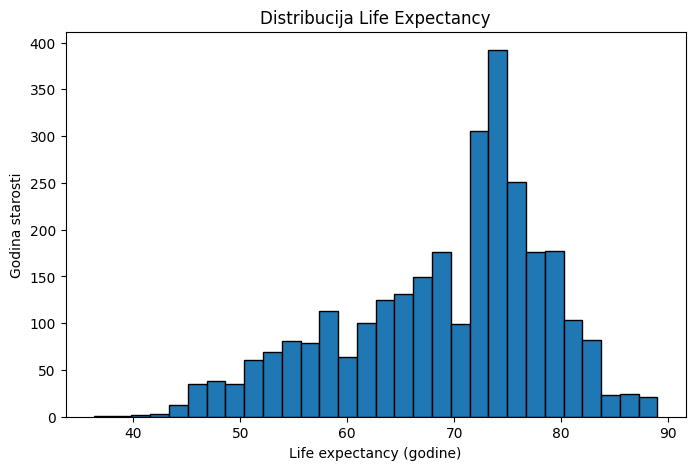

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(dataframe["Life expectancy"], bins=30,edgecolor="black",linewidth=1)
plt.xlabel("Life expectancy (godine)")
plt.ylabel("Godina starosti")
plt.title("Distribucija Life Expectancy")
plt.show()

In [8]:
pd.DataFrame({
    "missing_count": dataframe.isna().sum(),
    "missing_%": dataframe.isna().mean() * 100
}).query("missing_count > 0")

,missing_count,missing_%
Life expectancy,10,0.340368
Adult Mortality,10,0.340368
Alcohol,194,6.603131
Hepatitis B,553,18.822328
BMI,34,1.157250
Polio,19,0.646698
Total expenditure,226,7.692308
Diphtheria,19,0.646698
GDP,448,15.248468
Population,652,22.191967


Zbog ogromnog broja zemalja, vrsicemo observacije za 15 zemalja sa vrha dataseta

COUNTRY

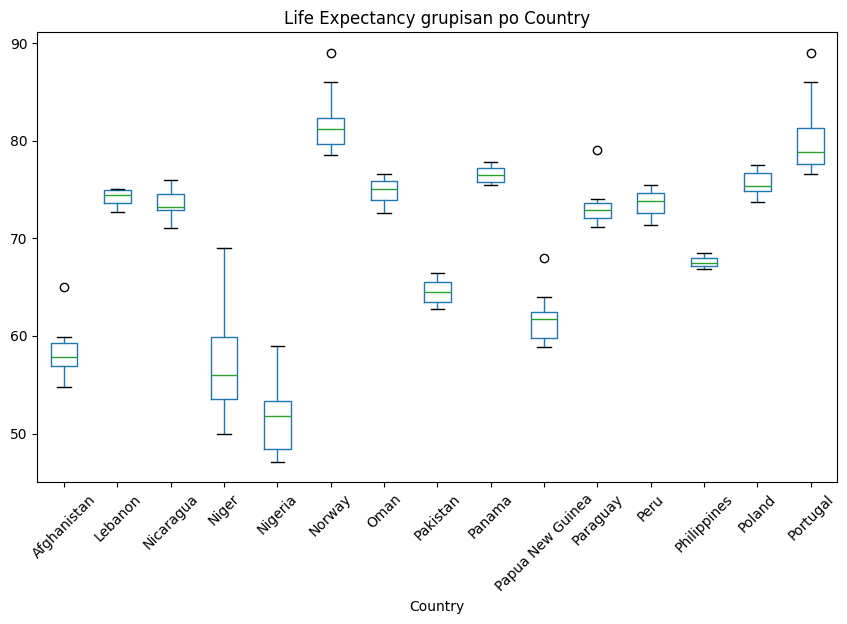

In [9]:
top_countries = dataframe["Country"].value_counts().head(15).index

dataframe[dataframe["Country"].isin(top_countries)].boxplot(
    column="Life expectancy",
    by="Country",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Country")
plt.suptitle("")
plt.grid(False)
plt.show()

YEAR

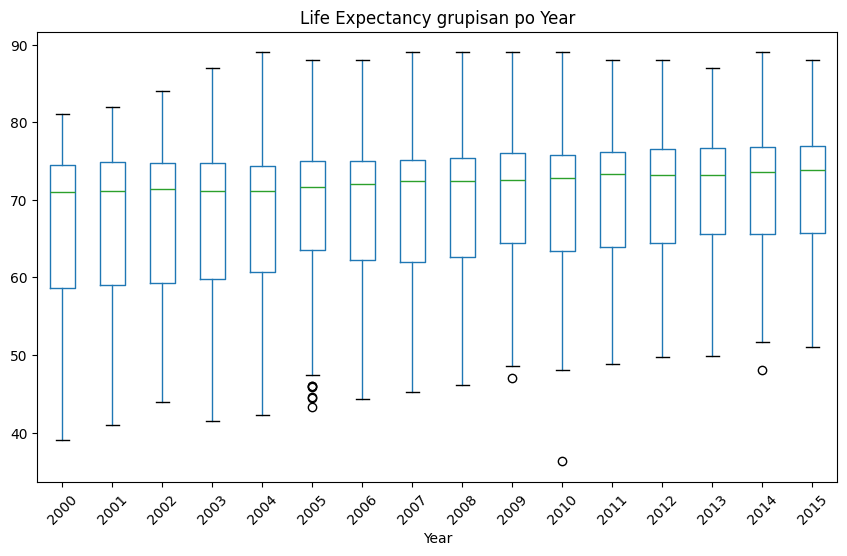

In [10]:
years = dataframe["Year"].value_counts().index

dataframe[dataframe["Year"].isin(years)].boxplot(
    column="Life expectancy",
    by="Year",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Year")
plt.suptitle("")
plt.grid(False)
plt.show()

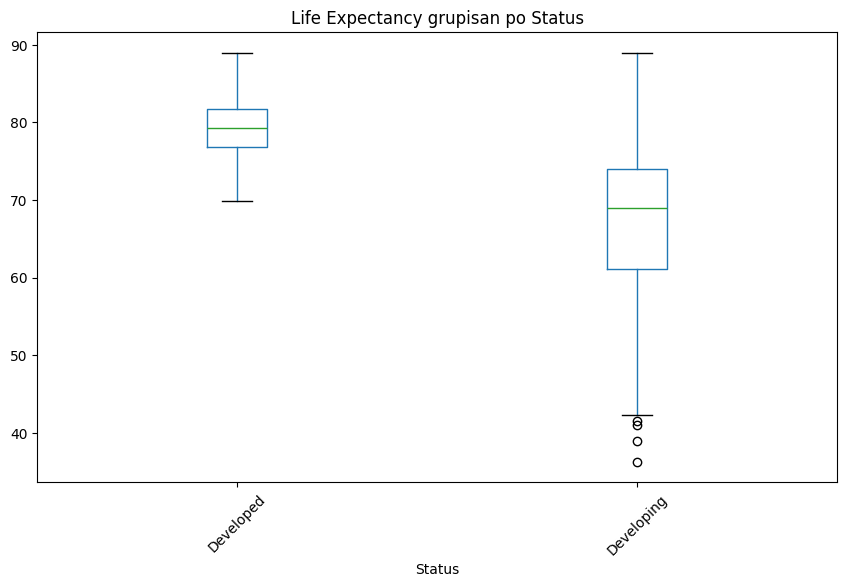

In [12]:
status = dataframe["Status"].value_counts().index

dataframe[dataframe["Status"].isin(status)].boxplot(
    column="Life expectancy",
    by="Status",
    figsize=(10, 6),
    rot=45
)

plt.title("Life Expectancy grupisan po Status")
plt.suptitle("")
plt.grid(False)
plt.show()

ADULT MORTALITY

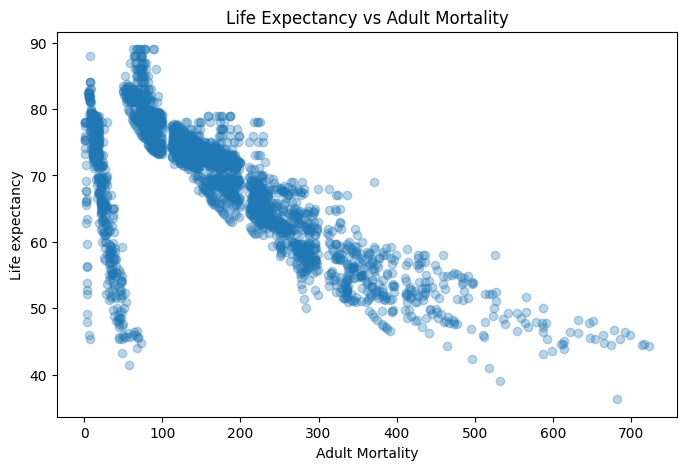

In [13]:
x = dataframe["Adult Mortality"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Adult Mortality")
plt.grid(False)
plt.show()

Odavde vidimo negativnu ali poprilicno jaku povezanost Adult Mortality-a i Life Expectancy-a (sto je Adult Mortality veci to je manji Life expectancy)
Uz to da nam outlier-i (donji desni podaci), ukazuju na trend koji je mozda izazvan epidemijom, ratovima itd.
Trend sa leve strane (prakticno vertikalni) nam oznacava ucestale vrednosti koje se ponavljaju u najcesce stabilnim zemljama (ocekujemo da dosta drzava ne varira previse u odnosu
Adult Mortality i Life Expectancy tokom vremena), ALI, vrlo je moguce i da neke od njih predstavljaju konkretene data error-e.
U zavinosti od toga da li je data error ili trend, mozemo kasnije zakljuciti racunom mean vrednosti te zemlje kroz godine itd.

INFANT DEATH

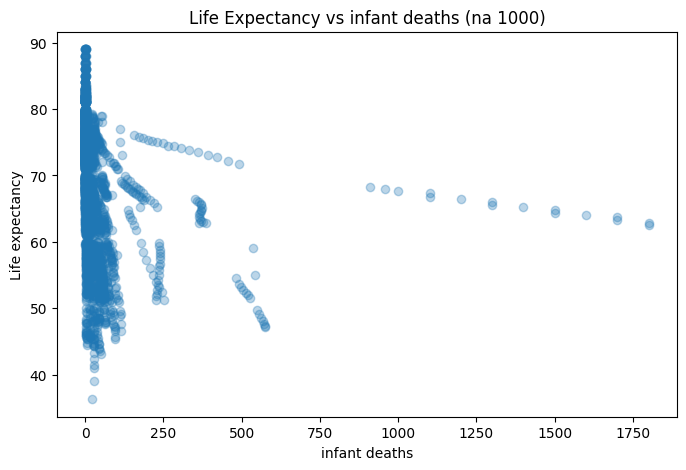

In [14]:
x = dataframe["infant deaths"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("infant deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs infant deaths (na 1000)")
plt.grid(False)
plt.show()

Promenljiva pokazuje apsolutan broj infant deaths x 1000, pa trend od preko 1000 infant deaths opisuje Indiju koja je imala veliki broj infant deaths kroz istoriju zbog zdravstvenih uslova,
trend izmedju 500 i 750 opisuje Kinu itd.
Levi stub oko kojeg vecina podataka pivotira ukazuje na manje drzave, sa manjim brojem infant deaths.
Sto idemo desnije od tog stuba, vidimo trendove za vece zemlje

ALCOHOL

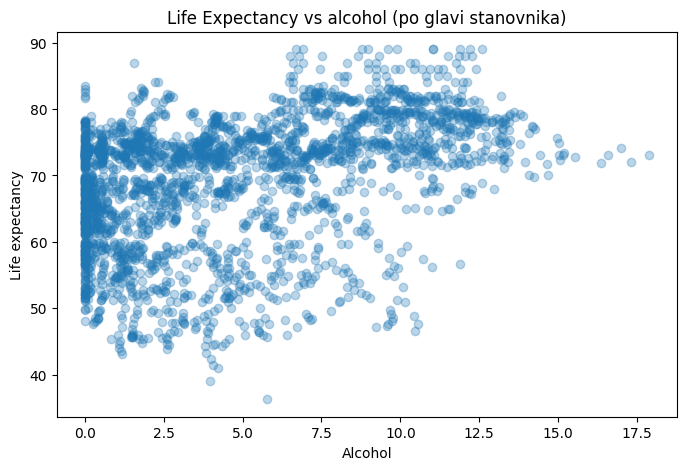

In [15]:
x = dataframe["Alcohol"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Alcohol")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs alcohol (po glavi stanovnika)")
plt.grid(False)
plt.show()

In [84]:
filtered_df_alcohol = (
    dataframe.loc[dataframe["Alcohol"] >= 15,
                  ["Country","Alcohol"]]
    .sort_values(by="Alcohol", ascending=False)
)
filtered_df_alcohol

,Country,Alcohol
874,Estonia,17.87
228,Belarus,17.31
873,Estonia,16.99
875,Estonia,16.58
227,Belarus,16.35
876,Estonia,15.52
1523,Lithuania,15.19
1525,Lithuania,15.14
877,Estonia,15.07
872,Estonia,15.04


Gledajuci plot ne vidimo jaku povezanost alkohola i Life expectancy-a, videvsi i drzave koje su imali vise od 15 Litra po glavi stanovnika, ne deluju kao outlieri posto su ovo drzave istocne Evrope poznate po velikom konzumiranju alkohola.
Imamo i zemlje koje imaju veliku konzumaciju alkohola ali su pak razvijene, imaju dobru medicinu itd pa zbog toga zadrzavaju solidan life expectancy, sto nam ukazuje da je alkohol povezan
sa razvojem.

PERCENTAGE EXPENDITURE

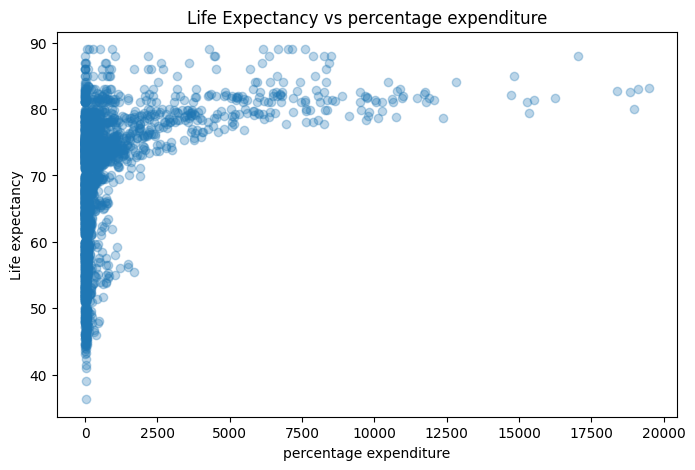

In [17]:
x = dataframe["percentage expenditure"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("percentage expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs percentage expenditure")
plt.grid(False)
plt.show()

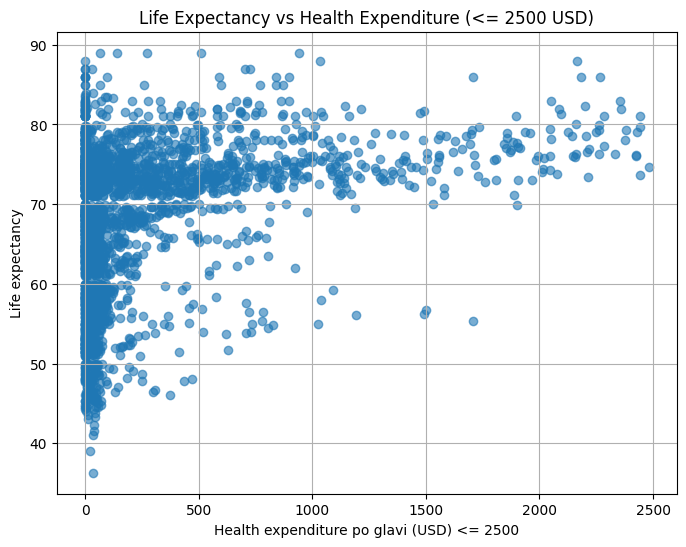

In [18]:
df_2500 = dataframe[dataframe["percentage expenditure"] <= 2500]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_2500["percentage expenditure"],
    df_2500["Life expectancy"],
    alpha=0.6
)

plt.xlabel("Health expenditure po glavi (USD) <= 2500")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Health Expenditure (<= 2500 USD)")
plt.grid(True)
plt.show()

Percentage expendtiure ovde predstavlja potrosnju na zdrasvto po glavi stanovnika, moguca multikolinearnost sa Total expenditure.
Jasno vidimo stub sa leve strane, koji ima raspodelu od minimuma do maksimuma za life expectancy, sto znaci da i drugi faktori jasno uticu na life expectancy ali ujedno da potrosnja do 2500 veoma jako utice na life expectancy, dok otp. preko 2500 dolazi do zasicenja, i ne vidimo rast u life expectancy-u.
Sa drugog plot-a vidimo jasan rast life expectancy-a za health expenditure (<=2500). 
Outlier-i nam ovde prerdstavlju life expectancy koji je (<50 ili >80) posto poprilicno nadmasuje prosecno life expectancy na globalnom nivou. Oni ne moraju nuzno biti uklonjeni posto mozda ukazuju na realne situacije (rat, epidemija... ili developed zemlje, dobar health care itd) 

(dosta ovakvih promenljivih mogu da se poboljasaju log transformacijama, ali otom potom)

Hepatitis B

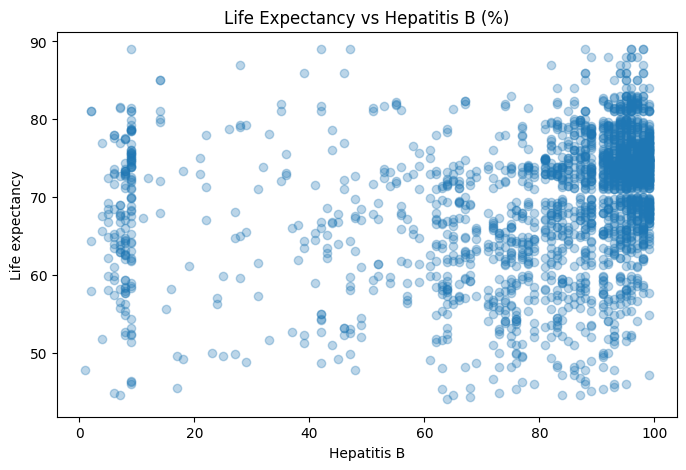

In [19]:
x = dataframe["Hepatitis B"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Hepatitis B")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Hepatitis B (%)")
plt.grid(False)
plt.show()

Ova promenljiva opisuje imunizaciju medju 1-godisnjom decom u %.
Postoji direktna povezanost sa life expectancy-om ali veza nije linerna (dosta tacaka sa visokom imunizacijom i life expectancyem), poprilicno je rasprsena, moze se upotrebiti za kategorijsku prom.
Takdoje imamo jasne high leverage point-ove. (0-15%,95-100%)
I imamo informativne outliere, gde odredjeni primeri imaju mali life expectancy iako imaju jak % imunizacije, sto ukazuje na uticaj drugih faktora.

MEASLES

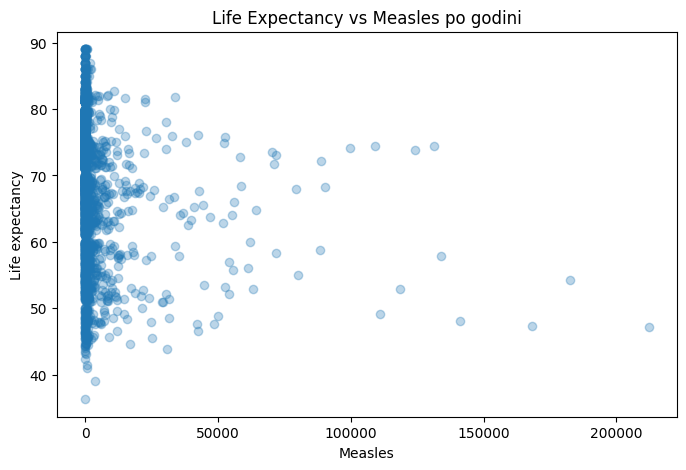

In [20]:
x = dataframe["Measles"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Measles")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Measles po godini")
plt.grid(False)
plt.show()

In [83]:
filtered_df_measles = (
    dataframe.loc[dataframe["Measles"] >= 100000,
                  ["Country","Measles"]]
    .sort_values(by="Measles", ascending=False)
)
filtered_df_measles

,Country,Measles
567,China,131441
570,China,124219
1575,Malawi,118712
1903,Nigeria,110927
568,China,109023


Dosta podataka za Measles(Male boginje) pivotira oko 0, sto je normalan indikator posto vecina drzava nema prijavljen veliki broj Malih boginja, ali se ocigledno ne moze uociti direktna linearna veza izmedju slucajeva malih boginja i life expectancy-a.
Ekstremni slucajevi (>100 000) ukazuju na epidemije malih boginja, ovi high leverage podaci su opravdano veliki za te drzave i godine.

BMI

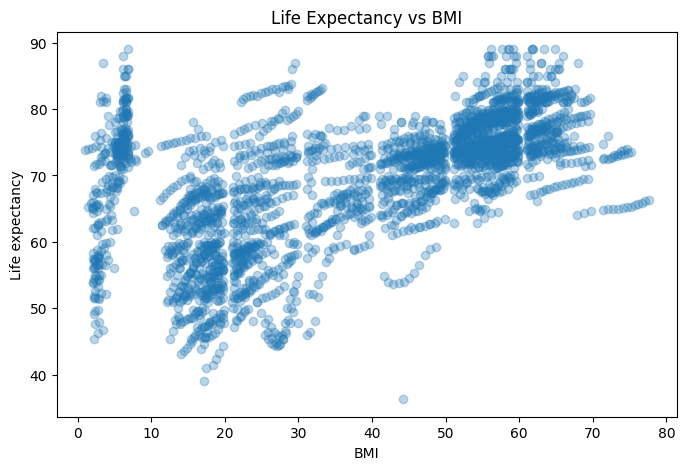

In [22]:
x = dataframe["BMI"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs BMI")
plt.grid(False)
plt.show()

Vidi se Jaka pozitivna veza izmedju BMI i Life expectancy-a ali nije linearna.
Veoma nizak BMI moze da nam ukazuje na drzave koje su siromasne i neuhranjene, ali mislim da dobar deo njih zapravo samo predstavlja data errore.
Ocigledni data errori za drzave su takodje i oni koji su >30, posto normalan chart BMI-a smatra Obese BMI koji je > 30. Sto na nivou drzave totalno nema smisla.
Najbolja odluka za ovaj feature bi bio dropping celog feature-a.

UNDER-FIVE-DEATHS

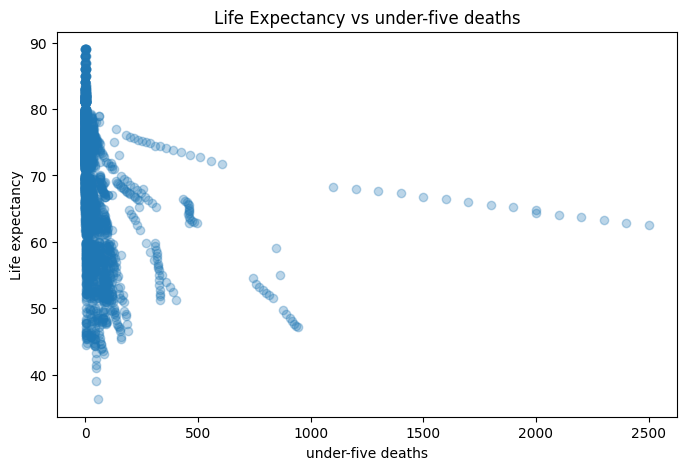

In [23]:
x = dataframe["under-five deaths"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("under-five deaths")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs under-five deaths")
plt.grid(False)
plt.show()

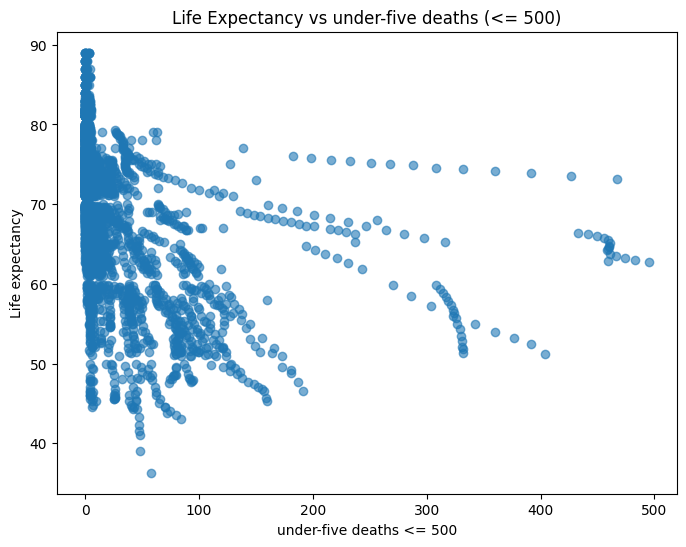

In [25]:
df_2500 = dataframe[dataframe["under-five deaths"] <= 500]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_2500["under-five deaths"],
    df_2500["Life expectancy"],
    alpha=0.6
)

plt.xlabel("under-five deaths <= 500")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs under-five deaths (<= 500)")
plt.grid(False)
plt.show()

Moze se videti relativno jaka negativna povezanost sa under-five deaths, ali i dalje ocigledno nedovoljno da sama opise life exepctancy kao i vecina drugih promenljivih do sad.
High leverage point-ovi trebaju biti istrazeni, ali obicno ukazuju na ogromne drzave. (Promenljiva opet predstavlja ukupni broj preminule dece, ne na 1000 stanovnika kao sto dataset opisuje)
Ponovo, 0 moze biti odlika nevalidnih vrednosti (najverovatnije), ali moze biti i inidkator razvijenih zemalja (sto je opet nerealno s obzirom da je globalni prosek 37)

POLIO

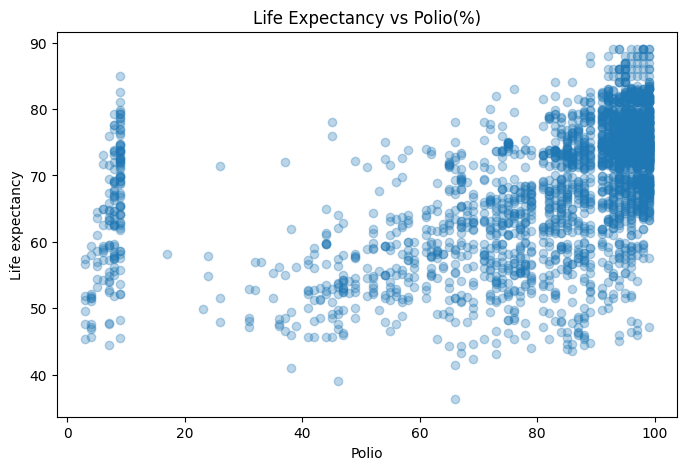

In [26]:
x = dataframe["Polio"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Polio")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Polio(%)")
plt.grid(False)
plt.show()

Promenljiva predstavlja procentualni broj vakcinisanih 1-godisnjaka, vidi se jaka povezanost, ali poprilicno monotona, svakako se vidi dobro grupisanje oko 10% i 95%, s toga je pogodna za 
transformaciju u kategorijsku promenljivu. Niske vrednosti su ili outlier-i ili jednostavno Polio nema toliki uticaj na life expectancy.

TOTAL EXPENDITURE

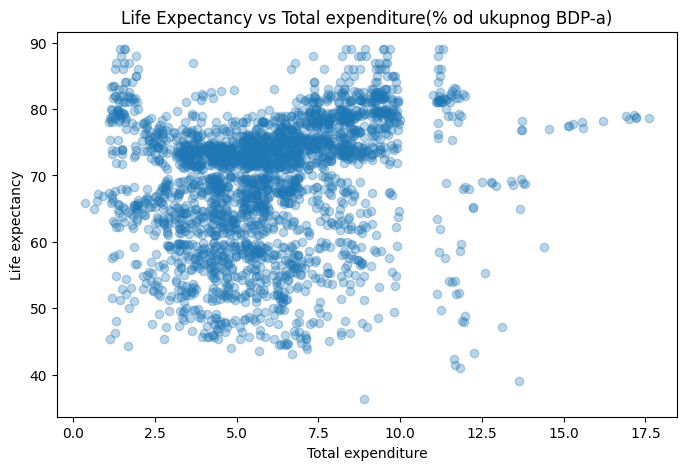

In [27]:
x = dataframe["Total expenditure"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Total expenditure")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Total expenditure(% od ukupnog BDP-a)")
plt.grid(False)
plt.show()

Total expenditure ima jako rasutu distribuciju, i sam po sebi je vrlo los feature, mozda ako ukljucimo neku multikolinearnost moze biti bolji (sa tipa adult mortality), ima prisutne i high leverage  pointove koji ne uticu na life expectancy.

DIPTHTHERIA

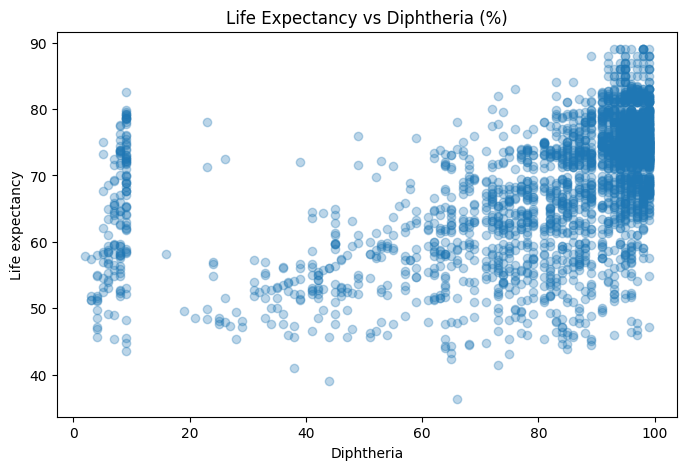

In [28]:
x = dataframe["Diphtheria"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Diphtheria")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Diphtheria (%)")
plt.grid(False)
plt.show()

Isto kao za Polio

HIV/AIDS

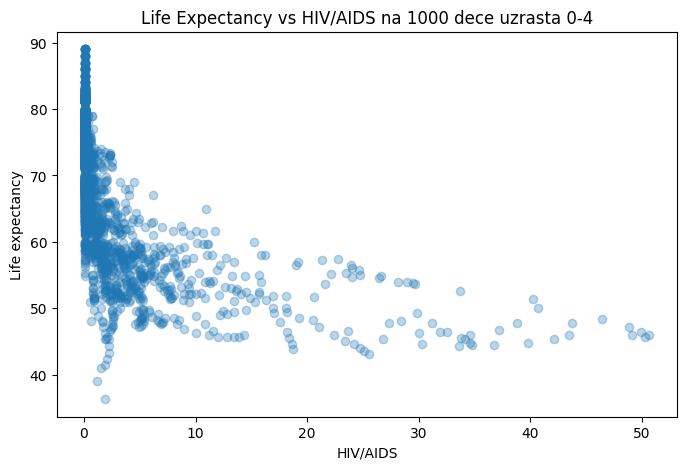

In [29]:
x = dataframe["HIV/AIDS"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("HIV/AIDS")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs HIV/AIDS na 1000 dece uzrasta 0-4")
plt.grid(False)
plt.show()

Vidimo relativno okej negativno povezani trend, ali da ponovo promenljiva, kao i vecina ostalih, ne moze sama po sebi lepo opisati life expectancy, ali posto je vecinom oko 0, moze imati lep uticaj na predikciju. 
Za visoke vrednosti vidimo drasticno nizi life expectancy sto je ocekivano (africke zemlje)

GDP

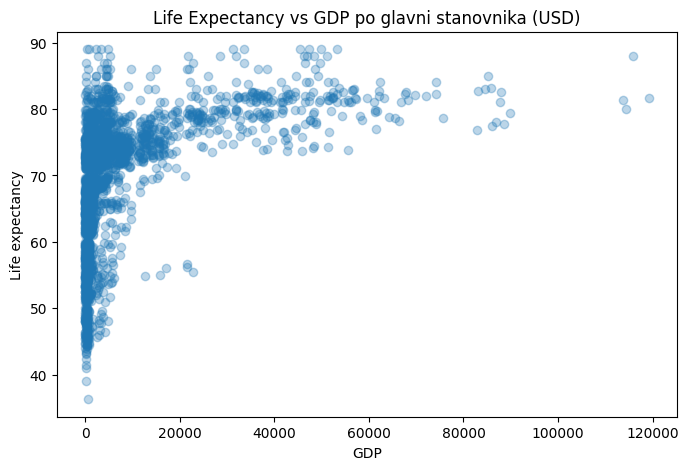

In [30]:
x = dataframe["GDP"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("GDP")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs GDP po glavni stanovnika (USD)")
plt.grid(False)
plt.show()

In [61]:
filtered_df_GDP = (
    dataframe.loc[dataframe["GDP"] >= 60000,
                  ["Country","GDP"]]
    .sort_values(by="GDP", ascending=False)
)
filtered_df_GDP

,Country,GDP
1539,Luxembourg,119172.74180
1542,Luxembourg,115761.57700
1545,Luxembourg,114293.84330
1540,Luxembourg,113751.85000
1547,Luxembourg,89739.71170
1549,Luxembourg,75716.35180
114,Australia,67792.33860
115,Australia,67677.63477
1550,Luxembourg,65445.88530
116,Australia,62245.12900


Za GDP (po glavi stanovnika) mozemo jasno uociti pozitivnu povezanost, koja nije linearna, ali da ponovo ne mozemo na osnovu nje same po sebi zakljuciti jasan i jak efekat na life expectancy. Pritom, vidimo da drzave koje imaju velik GDP u proseku imaju veoma velik Life expectancy, ali da postoji neki marginalni efekat GDP-a (iznac 20000 se ne povecava znacajno Life expectancy).
Posmatranjem GDP-a koji je veci od 60 000, vidimo da ove tacke iako jesu influental points, ne predstavljaju netacne podatke, posto je GDP za Luxemburg stvarno i toliko visok.
U moru ovih niskih GDP-ova smo sigurni da postoje data errori u levom stubu, ali je prirodno da za vecinu zemalja bude < 10-15k .

POPULATION

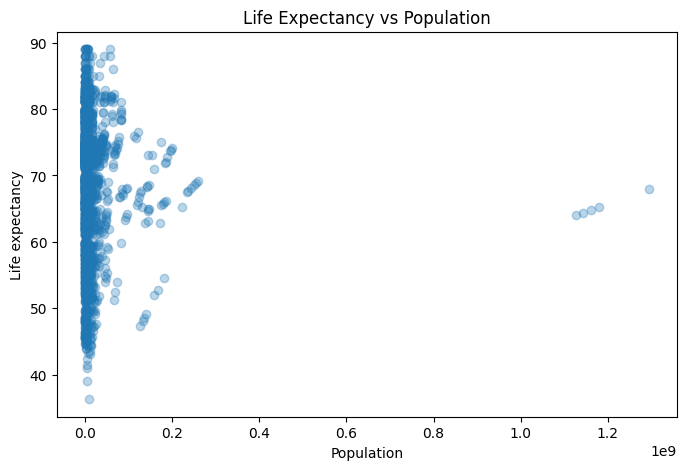

In [31]:
x = dataframe["Population"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Population")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Population")
plt.grid(False)
plt.show()

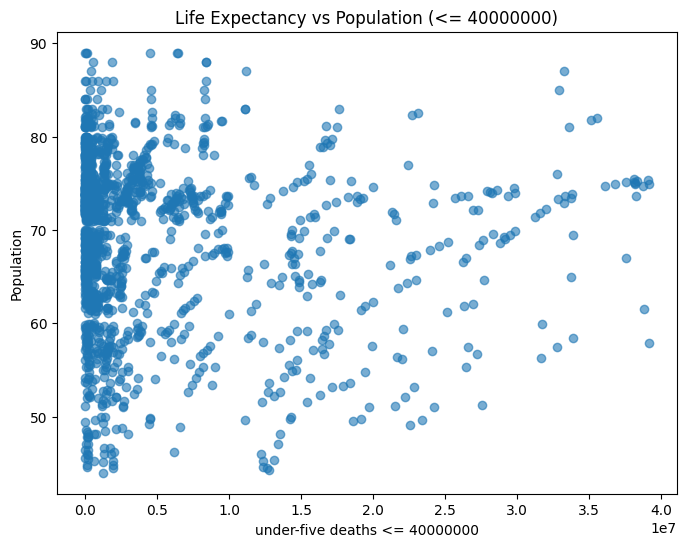

In [48]:
df_40000000 = dataframe[dataframe["Population"] <= 40000000]

plt.figure(figsize=(8, 6))
plt.scatter(
    df_40000000["Population"],
    df_40000000["Life expectancy"],
    alpha=0.6
)

plt.xlabel("under-five deaths <= 40000000")
plt.ylabel("Population")
plt.title("Life Expectancy vs Population (<= 40000000)")
plt.grid(False)
plt.show()

In [ ]:
filtered_df_population = (
    dataframe.loc[dataframe["Population"] >= 1000000000, 
                  ["Country", "Population"]]
    .sort_values(by="Population", ascending=False)
)
filtered_df_population

,Country,Population
1187,India,1.293859e+09
1194,India,1.179681e+09
1195,India,1.161978e+09
1196,India,1.144119e+09
1197,India,1.126136e+09


In [55]:
filtered_df_china = dataframe.loc[
    dataframe["Country"] == "China",
    ["Country", "Population"]
]
filtered_df_china

,Country,Population
561,China,136427.0
562,China,135738.0
563,China,135695.0
564,China,134413.0
565,China,133775.0
566,China,133126.0
567,China,1324655.0
568,China,1317885.0
569,China,13112.0
570,China,13372.0


Population ocigledno nema linearne povezanosti sa Life expectancy. Podaci od preko 1 milijarde su ocekivani za drzavu poput Indije, ali i za drzavu poput Kine, sto je dodatna nelogicnost, ako posmatramo podatke za Kinu, vidimo da su ocigledno netacni.
Mimo toga, ne mozemo zakljuciti nikakvu korelisanost sa life expectancy.

THINNESS 1-19 YEARS koji je zapravo 10-19 years (greska u imenovanju kolone)

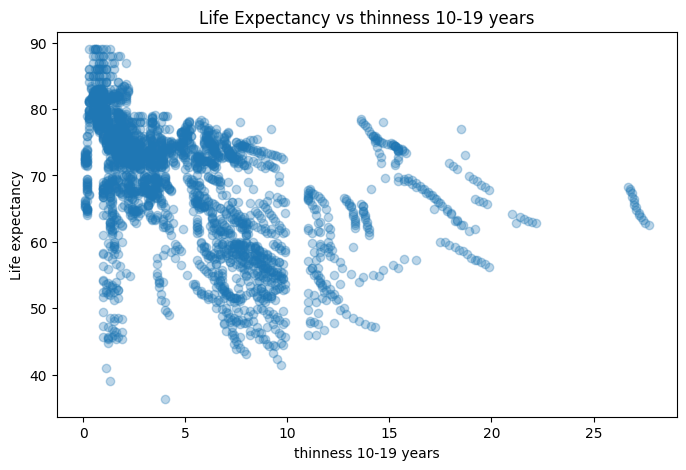

In [32]:
x = dataframe["thinness 10-19 years"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("thinness 10-19 years")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs thinness 10-19 years")
plt.grid(False)
plt.show()

Promenljiva opisuje "Ucestalost mrsavosti medju decom i adolescentima izmedju 10 i 19 godina u procentima" sto nam oznacava BMI koji je ispod ref. vrednosti, odnosno nedostatak nutritivnih vrednosti.
Moze se uociti slaba do umerena negativna linearna povezanost sa Life expectancty koja nije toliko izricita, sve klastere koji formiraju liniju mozemo videti kao entry-je za zasebne drzave, koje prate odredjeni trend neuhranjenosti.
Svakako je pristuno da je Life expectancy visok za vrednosti koje su blizu 0, ali vertikalni stub koji se javlja svuda naznacava uticaj drugih socio-ekonomskih faktora koji uticu na LE. Mozemo je posmatrati/kombinovati i sa drugim indikatorima (featurima)

THINNESS 5-9 YEARS

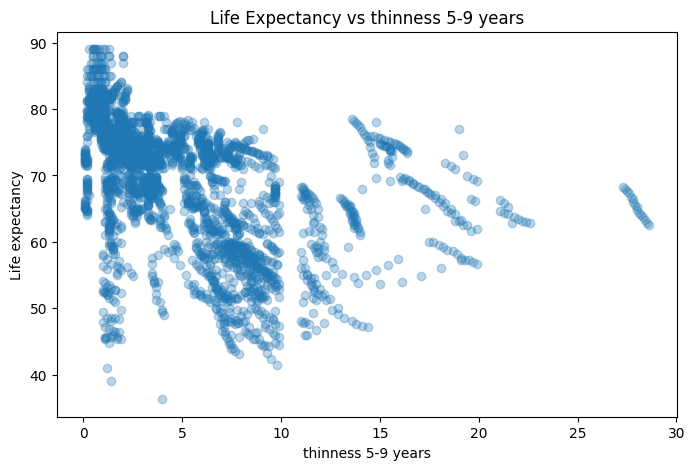

In [33]:
x = dataframe["thinness 5-9 years"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("thinness 5-9 years")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs thinness 5-9 years")
plt.grid(False)
plt.show()

Isti zakljucak kao za 10-19 thinness

INCOME COMPOSITION OF RESOURCES

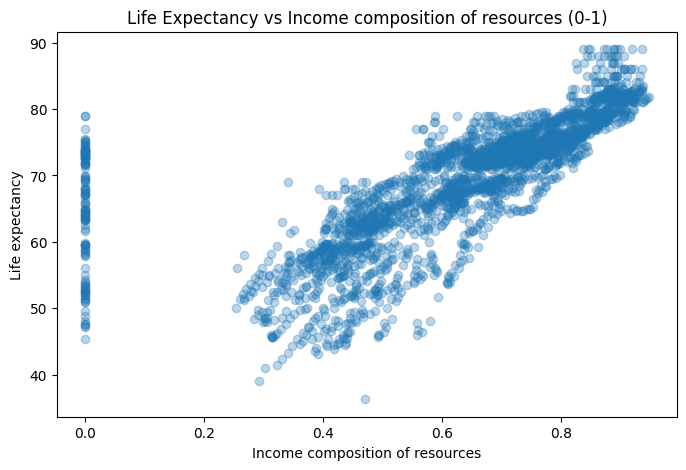

In [34]:
x = dataframe["Income composition of resources"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Income composition of resources")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Income composition of resources (0-1)")
plt.grid(False)
plt.show()

In [63]:
df_filtered_icr = (
    dataframe.loc[dataframe["Income composition of resources"] < 0.1,
                  ["Country","Income composition of resources"]]
    .sort_values(by="Income composition of resources", ascending=False)
    
)
df_filtered_icr

,Country,Income composition of resources
293,Bhutan,0.0
294,Bhutan,0.0
1468,Lebanon,0.0
1469,Lebanon,0.0
1470,Lebanon,0.0
1471,Lebanon,0.0
1472,Lebanon,0.0
1473,Lebanon,0.0
2296,Seychelles,0.0
2702,Turkmenistan,0.0


Promenljiva opisuje razvoj zasnovan na prihodima po stanovniku, koji je normalizovan izmedju 0 i 1.
Za data entry-e gde je ova vrednost = 0.0, treba proveriti da li je to uopste moguce, teoretski deluje moguce, ali te drzave bi morale biti poptpune dikatature gde ne postoji veci economic income za stanovnika po godini, komunizam ili sta vec, sto je realno verovatno nemoguce, pa su ovi data entry-ji most probably opet, data errori (laka ti zemlja ema).
Mimo toga, vidimo jasnu i jaku pozitivnu povezanost ove promenljive sa Life expectancty-jem, gde high leverage pointovi dostizu cak i ~ 90 godina.
Siguran kandidat za feature selection.
U poredjenju sa GDP-om, ovaj indeks nam daje jasniji indikator.

SCHOOLING

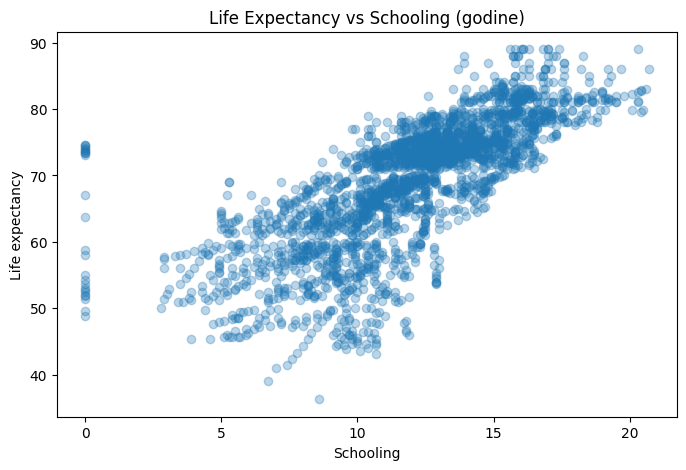

In [35]:
x = dataframe["Schooling"]
y = dataframe["Life expectancy"]

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.3)
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Life Expectancy vs Schooling (godine)")
plt.grid(False)
plt.show()

Na istu notu kao Income composition of resources. Mislim da je Schooling 0 na nivou drzave, sigurno nemoguc.

In [75]:
dataframe.isna().sum()
dataframe = dataframe.dropna()

In [ ]:
#PRIVREMENO  ZA STATUS SAM STAVIO

dataframe = pd.get_dummies(
    dataframe,
    columns=["Status"],
    drop_first=True
)

In [78]:
features =[
    "Schooling",
    "Income composition of resources",
    "Adult Mortality",
    "Status_Developing",
    "Polio",
    "Diphtheria",
    "HIV/AIDS"
]

target = "Life expectancy"

X = dataframe[features]
y = dataframe[target]

In [79]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.2,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [81]:
val_mae = mean_absolute_error(y_val,y_val_pred)
val_r2 = r2_score(y_val,y_val_pred)

test_mae = mean_absolute_error(y_test,y_test_pred)
test_r2 = r2_score(y_test,y_test_pred)

In [82]:
print("VAL MAE : ",val_mae)
print("VAL R2",val_r2)

print("TEST MAE : ",test_mae)
print("TEST R2",test_r2)

VAL MAE :  2.8046733674931756
VAL R2 0.7844793224999367
TEST MAE :  3.024573442200814
TEST R2 0.7989473506888403


Izborom novih promenljivih za feature selection vidimo poboljsanje od ~0.5 tj. pola godine i poboljsanje R^2 metrike za 0.12!